### About Dataset 

##### Context
- Predict the behaviour to retain the customers. You can analyse all relevant customer data and develop focused customer retention programs. 

##### Content

<p>The dataset includes information about these features:</p>
<li>Churn column refers to the customers that left within the last month</li>
<li> Services that each customer has signed up for- phone,multiple lines, internet, online secturity, device protection,paperless billing,monthly charges and total charges.</li>
<li>Demographic information about customers - gender,age,range and if they have partners and dependents.</li>


### Exploration and Data loading

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)     

In [4]:
print(df.shape)

(7043, 21)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Most features are categorical and only a few are numerical

In [6]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


- Categorical features that only have 2 unique values we will use binary encoding.
- For those that have more than 3 or 4 values we can use One Hot Encoding.

In [7]:
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]

# Map Yes/No and Male/Female to 0/1
df[binary_cols] = df[binary_cols].replace({
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0
})


/tmp/ipykernel_24951/3519679783.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [9]:
multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


### Cleaning

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
# coerce means when pandas fails to convert a value instead of throwing an error 
# it becomes a NaN 

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [13]:
df = df.drop('customerID',axis=1)

In [14]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)  

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

In [16]:
df.shape

(7043, 31)

In [17]:
corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


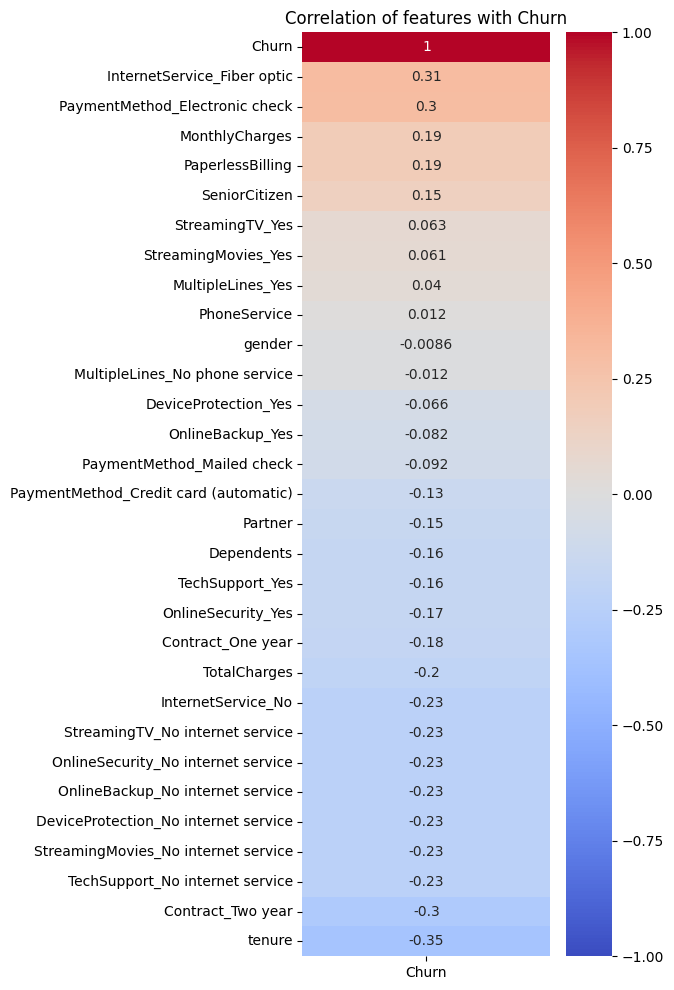

In [18]:
corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix[['Churn']].sort_values(by='Churn',ascending=False)
plt.figure(figsize=(4,12))
sns.heatmap(churn_corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title("Correlation of features with Churn")
plt.show()

Negative correlation (less likely to churn)

- tenure (-0.35): Customers who stay longer are less likely to churn
- Contract_Two_year (-0.3): Customers on long-term contracts churn churn much less.
- Contract_One_Year (-0.18): Same trend but weaker than 2 year contracts.

Positive Correlation (more likely to churn)

- InternetService_Fiber_optic (+ 0.31): Fiber optic users churn more in this dataset.
- PaymentMethod_Electronic_check (+ 0.30): Customers paying electronically via check churn more. 

### Examining multicolinearity
- 2 or more features in regression model are highly correlated. 
- When this happens the model struggles to identify which variable is influencing the target
- Leads to unstable coefficients, high variance.
- If VIF > 5 (moderate multicollinearity), VIF > 10 (serious multicollinearity)
- We can use PCA, regularize or collect more data

In [19]:
df['No_internet_service'] = (
    df['OnlineSecurity_No internet service'] |
    df['OnlineBackup_No internet service'] |
    df['DeviceProtection_No internet service'] |
    df['TechSupport_No internet service'] |
    df['StreamingTV_No internet service'] |
    df['StreamingMovies_No internet service']
).astype(int)

drop_cols = [col for col in df.columns if 'No internet service' in col]
df = df.drop(columns=drop_cols)

if "MultipleLines_No phone service" in df.columns:
    df['No_phone_service'] = df['MultipleLines_No phone service'].astype(int)
    df = df.drop(columns=['MultipleLines_No phone service'])

In [20]:
X = df.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)


                                  feature          VIF
11                     InternetService_No          inf
23                    No_internet_service          inf
5                            PhoneService  1773.528816
7                          MonthlyCharges   866.089640
10            InternetService_Fiber optic   148.500814
24                       No_phone_service    60.842267
17                    StreamingMovies_Yes    24.156394
16                        StreamingTV_Yes    24.080019
8                            TotalCharges    10.811490
4                                  tenure     7.584453
9                       MultipleLines_Yes     7.289761
14                   DeviceProtection_Yes     6.924754
13                       OnlineBackup_Yes     6.796678
15                        TechSupport_Yes     6.476508
12                     OnlineSecurity_Yes     6.338349
19                      Contract_Two year     2.652328
21         PaymentMethod_Electronic check     1.976032
22        

/home/surya/anaconda3/envs/churn_env/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


- There is high multicollinearity between features.
- So we can either drop features or use regularization
- We can also use tree based models which are less sensitive to this 

In [22]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

We need to consider precision, recall, f1 score, roc-auc score since there is a class imbalance

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

# Prepare data
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

THRESHOLD = 0.3  # lower than 0.5 to boost recall (see next to choose the right value)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=False
)

rf.fit(X_train,y_train)

proba = rf.predict_proba(X_test)[:,1]
y_pred = (proba >= THRESHOLD)
print(classification_report(y_test,y_pred,digits=1))

              precision    recall  f1-score   support

           0        0.9       0.8       0.8      1035
           1        0.5       0.7       0.6       374

    accuracy                            0.8      1409
   macro avg        0.7       0.7       0.7      1409
weighted avg        0.8       0.8       0.8      1409



In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:, 1]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")


Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.505   0.791   0.617   
0.3     0.532   0.725   0.614   
0.35    0.549   0.671   0.604   
0.4     0.573   0.620   0.596   
0.45    0.597   0.551   0.573   
0.5     0.624   0.492   0.550   


In [27]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report 
import time 

lgbm = LGBMClassifier(n_estimators=500,
                      learning_rate=0.05,
                      class_weight='balanced',
                      random_state=42,
                      n_jobs=-1)

start_time = time.time()
lgbm.fit(X_train,y_train)

train_time = time.time() - start_time
print(f"Training time:{train_time:.2f} seconds")

start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"Prediction time: {pred_time:.4f} seconds")

print(classification_report(y_test, y_pred, digits=3))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training time:1.57 seconds
Prediction time: 0.0061 seconds
              precision    recall  f1-score   support

           0      0.914     0.702     0.795      1035
           1      0.498     0.818     0.619       374

    accuracy                          0.733      1409
   macro avg      0.706     0.760     0.707      1409
weighted avg      0.804     0.733    

In [28]:
start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))


⏱ Prediction time: 0.0168 seconds
              precision    recall  f1-score   support

           0      0.914     0.702     0.795      1035
           1      0.498     0.818     0.619       374

    accuracy                          0.733      1409
   macro avg      0.706     0.760     0.707      1409
weighted avg      0.804     0.733     0.748      1409



In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Training time: {train_time:.2f} seconds")

start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"Prediction time: {pred_time:.4f} seconds")

print(classification_report(y_test, y_pred, digits=3))



Training time: 4.53 seconds
Prediction time: 0.0148 seconds
              precision    recall  f1-score   support

           0      0.907     0.700     0.791      1035
           1      0.492     0.802     0.610       374

    accuracy                          0.727      1409
   macro avg      0.700     0.751     0.700      1409
weighted avg      0.797     0.727     0.743      1409



In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")


Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.468   0.829   0.598   
0.3     0.492   0.802   0.610   
0.35    0.511   0.791   0.621   
0.4     0.524   0.765   0.622   
0.45    0.535   0.722   0.614   
0.5     0.549   0.698   0.615   


In [32]:
import optuna 
from xgboost import XGBClassifier
from sklearn.metrics import recall_score 
from sklearn.model_selection import train_test_split

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }

    model = XGBClassifier(**params)
    model.fit(X_train,y_train)
    proba = model.predict_proba(X_test)[:,1]
    y_pred = (proba >= THRESHOLD).astype(int)
    return recall_score(y_test,y_pred,pos_label=1)

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=30)

[I 2025-11-14 15:14:18,284] A new study created in memory with name: no-name-0b02f787-0e23-41ba-8350-a1bd67072946
[I 2025-11-14 15:14:23,402] Trial 0 finished with value: 0.7834224598930482 and parameters: {'n_estimators': 752, 'learning_rate': 0.16519059752250345, 'max_depth': 5, 'subsample': 0.821186663955862, 'colsample_bytree': 0.8925007442675521, 'min_child_weight': 10, 'gamma': 0.2600801695101368, 'reg_alpha': 1.778427600528107, 'reg_lambda': 2.8525526053525407}. Best is trial 0 with value: 0.7834224598930482.
[I 2025-11-14 15:14:23,760] Trial 1 finished with value: 0.9117647058823529 and parameters: {'n_estimators': 605, 'learning_rate': 0.19659699599808944, 'max_depth': 7, 'subsample': 0.9941902010686648, 'colsample_bytree': 0.5333273413536052, 'min_child_weight': 8, 'gamma': 2.724901338812338, 'reg_alpha': 4.935844600817934, 'reg_lambda': 3.982658784738342}. Best is trial 1 with value: 0.9117647058823529.
[I 2025-11-14 15:14:25,085] Trial 2 finished with value: 0.8743315508021

In [36]:
print("Best Recall score:",study.best_value)
print("Best parameters:",study.best_params)

Best Recall score: 0.9224598930481284
Best parameters: {'n_estimators': 418, 'learning_rate': 0.04713636541691728, 'max_depth': 9, 'subsample': 0.9284923984903917, 'colsample_bytree': 0.7141286387942822, 'min_child_weight': 4, 'gamma': 4.902679914330014, 'reg_alpha': 3.699500986197486, 'reg_lambda': 1.948843079515469}


In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

# Create model from best params
xgb = XGBClassifier(**best_params)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f" Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f" Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))


 Training time: 1.24 seconds
 Prediction time: 0.0056 seconds
              precision    recall  f1-score   support

           0      0.954     0.576     0.718      1035
           1      0.440     0.922     0.596       374

    accuracy                          0.668      1409
   macro avg      0.697     0.749     0.657      1409
weighted avg      0.817     0.668     0.686      1409



In [41]:
import mlflow 
import mlflow.sklearn
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score
import time 
import os 

project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
# print(project_root)

mlflow.set_tracking_uri(f"file://{project_root}/mlruns") 
# saves the experiment runs in file://{project_root}/mlruns (local folder)
mlflow.set_experiment("Telco Churn - XGBoost")
# Groups all runs under Telco Churn - XGBoost
with mlflow.start_run():
    # starts new mlflow run tracks metrics,params,model,train time,pred time 
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
    best_params = study.best_params
    best_params.update({
        "random_state":42,
        "n_jobs":-1,
        "scale_pos_weight":scale_pos_weight,
        "eval_metric":"logloss"
    })

    mlflow.log_params(best_params)

    # Timing the trainer 
    start_time = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train,y_train)

    train_time = start_time - time.time()
    mlflow.log_metric('train_time',train_time)

    # Prediction 
    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:,1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric("pred_time",pred_time)

    precision = precision_score(y_test,y_pred,pos_label=1)
    recall = recall_score(y_test,y_pred,pos_label=1)
    f1 = f1_score(y_test,y_pred,pos_label=1)
    auc = roc_auc_score(y_test,proba)

    mlflow.log_metric("precision",precision)
    mlflow.log_metric("recall",recall)
    mlflow.log_metric("f1",f1)
    mlflow.log_metric("roc_auc",auc)

    mlflow.xgboost.log_model(xgb,"model")

    print(classification_report(y_test,y_pred,digits=3))


2025/11/14 16:00:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/14 16:00:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


              precision    recall  f1-score   support

           0      0.954     0.576     0.718      1035
           1      0.440     0.922     0.596       374

    accuracy                          0.668      1409
   macro avg      0.697     0.749     0.657      1409
weighted avg      0.817     0.668     0.686      1409

